In [14]:
import os
import pickle
from music21 import converter, instrument, note, chord
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from fractions import Fraction

In [2]:
midi_files = os.listdir('midi_files')
pickle_path = 'pickles/music21_objects'

##### Example to inspect before acting on all files

In [3]:
example = converter.parse(f'midi_files/{midi_files[0]}')
instruments = instrument.partitionByInstrument(example)

##### See all the instruments available in the song

In [5]:
for part in instruments.parts:
    print(part)

<music21.stream.Part Pipe Organ>
<music21.stream.Part Electric Organ>
<music21.stream.Part Harpsichord>
<music21.stream.Part StringInstrument>


##### Get the name of the instrument

In [6]:
instruments.parts[0].getInstrument().instrumentName

'Pipe Organ'

##### Go through each midi file, parse it, and extract data we want to inspect about it

In [140]:
# midi_file_data = []

# for file in midi_files:
#     parsed = converter.parse(f'midi_files/{file}')
#     data = {
#         'file_name': file,
#         'length': parsed.highestTime,
#     }
    
#     instruments = instrument.partitionByInstrument(parsed)
#     if instruments:
#         data['instruments'] = [part.getInstrument().instrumentName for part in instruments.parts]
        
#     midi_file_data.append(data)
    
# df = pd.DataFrame(midi_file_data)
# with open('pickles/midi_df.pickle', 'wb') as f:
#     pickle.dump(df, f)

with open('pickles/midi_df.pickle', 'rb') as f:
    global df
    df = pickle.load(f)

In [141]:
df.head()

file_name    length  \
0                        FridayThe13th_-_MapDark.mid    171.50   
1                                          cv1-4.mid    104.00   
2                                  MM3-Snake_Man.mid    296.00   
3                                        dw4batl.mid    290.00   
4  Balloon_Fight_-_Main_Theme_%28Dancing_Balloon%...  84337.25   

                                         instruments  
0  [Pipe Organ, Electric Organ, Harpsichord, Stri...  
1         [Electric Organ, Bass, Piano, Violoncello]  
2  [BASS (FINGER), Electric Bass, SYNTH BASS, Sam...  
3  [Electric Guitar, Bass, Electric Bass, Bass Su...  
4  [Steel Drum, Bass, Sampler, Synth bass, None, ...

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4204 entries, 0 to 4203
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   file_name    4204 non-null   string 
 1   length       4204 non-null   float64
 2   instruments  4201 non-null   object 
dtypes: float64(1), object(1), string(1)
memory usage: 98.7+ KB


##### Update types in the dataframe

In [143]:
# def round_fractions(row):
#     if isinstance(row['length'], Fraction):
#         row['length'] = round(row['length'])
#     return row

# df = df.apply(round_fractions, axis=1)
# df['file_name'] = df['file_name'].astype('string')

# df.info()

##### Save DF after changes

In [139]:
# with open('pickles/midi_df.pickle', 'wb') as f:
#     pickle.dump(df, f)

##### Pull out one giant list of all instruments for inspection

In [115]:
all_instruments = []

def combine_instruments(row_instruments):
    global all_instruments
    if isinstance(row_instruments, list):
        all_instruments += row_instruments
    
df['instruments'].apply(combine_instruments)

0       None
1       None
2       None
3       None
4       None
        ... 
4199    None
4200    None
4201    None
4202    None
4203    None
Name: instruments, Length: 4204, dtype: object

In [137]:
instruments_df = pd.DataFrame(all_instruments, columns=['instrument'])
instruments_df['instrument'].fillna('Unknown', inplace=True)
instruments_df.value_counts().head(25)

instrument      
Sampler             2253
Piano               2112
Electric Bass       1836
StringInstrument    1272
Unknown             1211
Electric Guitar      936
Acoustic Bass        649
Acoustic Guitar      617
Bass                 527
Electric Organ       484
Brass                480
Fretless Bass        381
Trumpet              309
Clarinet             270
Harp                 263
Flute                249
Voice                235
Celesta              212
Contrabass           212
Violin               188
Timpani              167
Horn                 163
Clavichord           156
Vibraphone           153
Harpsichord          152
dtype: int64

<AxesSubplot:xlabel='instrument'>

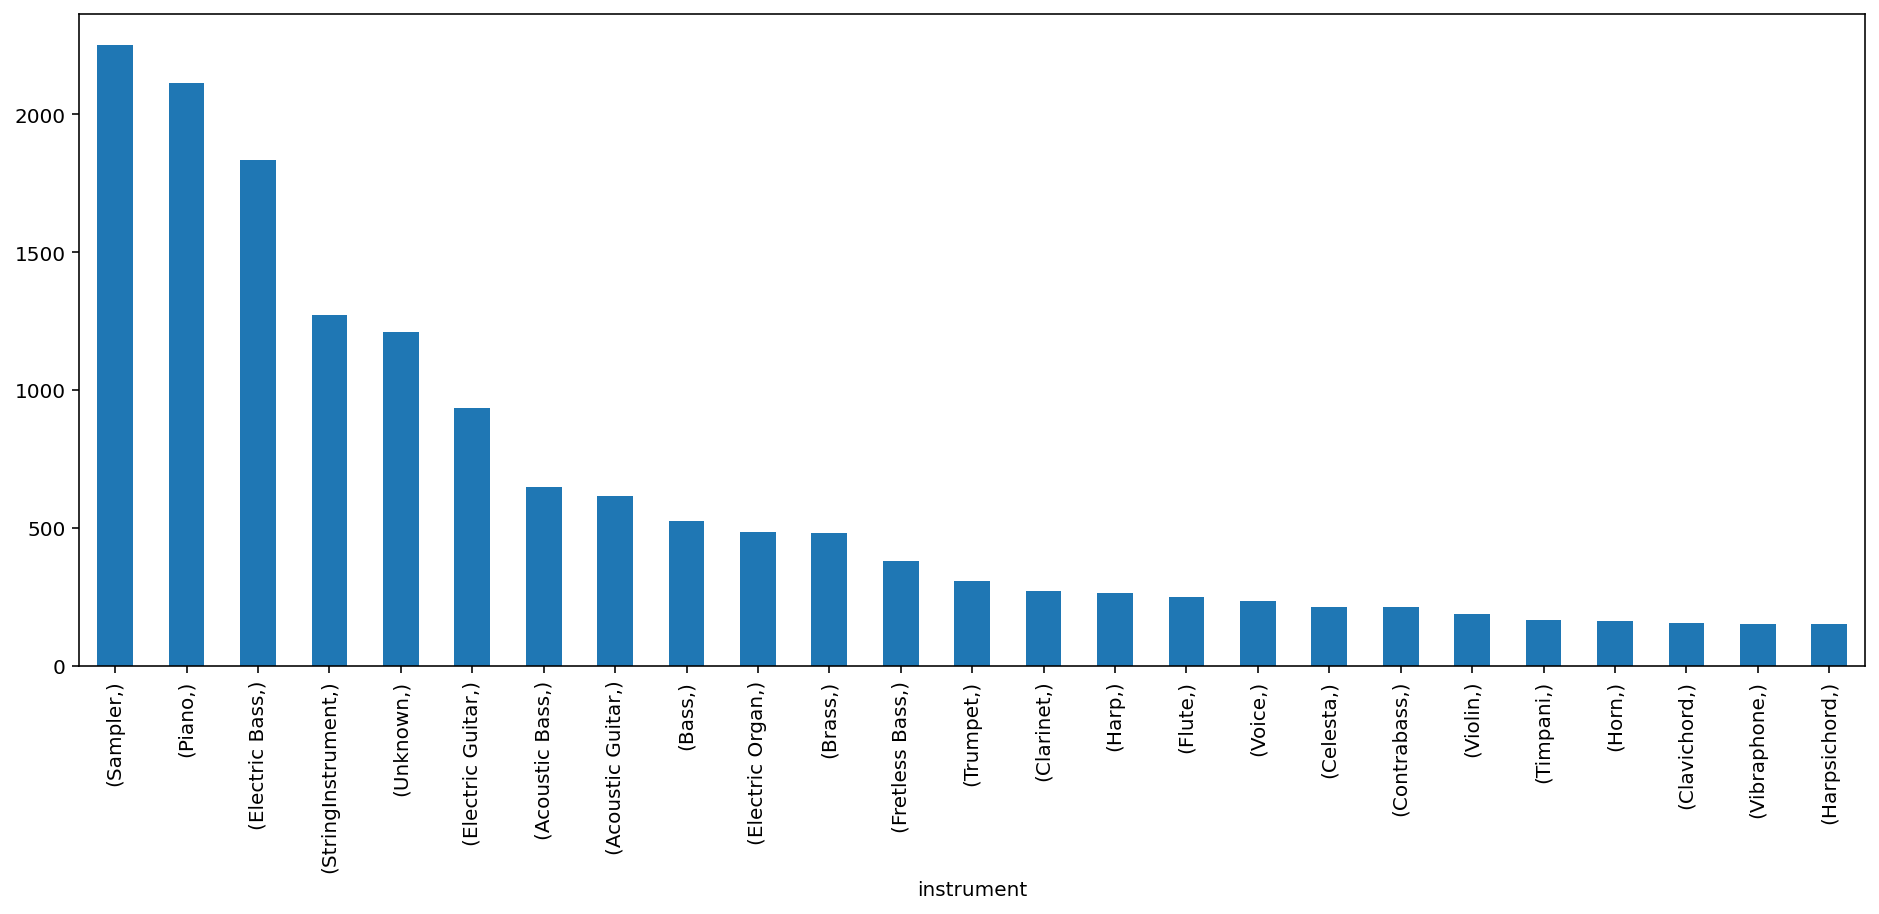

In [138]:
plt.figure(figsize=(16,6))
instruments_df.value_counts().head(25).plot(kind='bar')

##### Inspect the lengths of each song

In [148]:
df['length'].describe()

count    4.204000e+03
mean     1.449763e+05
std      6.737390e+06
min      7.500000e-01
25%      8.437500e+01
50%      1.628750e+02
75%      2.560000e+02
max      3.579141e+08
Name: length, dtype: float64

In [150]:
df.sort_values(by='length')

file_name        length  \
2555                              gzilla_soundtest6.mid  7.500000e-01   
2030                                   gzilla_death.mid  1.000000e+00   
2309                              gzilla_soundtest5.mid  1.000000e+00   
3562                                         c3cont.mid  1.000000e+00   
1288                                         c3deft.mid  1.000000e+00   
...                                                 ...           ...   
266                           vampire_killer%281%29.mid  2.487600e+04   
2313  Super_Mario_Bros_-_Castle_%28Techno_Gabber_rem...  8.143525e+04   
4     Balloon_Fight_-_Main_Theme_%28Dancing_Balloon%...  8.433725e+04   
4042                                   W%26W2_Water.mid  2.505398e+08   
3328                                  W%26W2_Level1.mid  3.579141e+08   

                                            instruments  
2555                                          [Sampler]  
2030                                          [Sampler]  
2309                                          [Sampler]  
3562           [StringInstrument, Acoustic Bass, Piano]  
1288           [StringInstrument, Acoustic Bass, Piano]  
...                                                 ...  
266   [Sampler, StringInstrument, Timpani, Techno Ba...  
2313                              [Sampler, Bass, None]  
4     [Steel Drum, Bass, Sampler, Synth bass, None, ...  
4042                    [Electric Bass, Sampler, Piano]  
3328                    [Electric Bass, Sampler, Piano]  

[4204 rows x 3 columns]

In [161]:
grouped_lengths = length_df.groupby(pd.cut(length_df['length'], bins=[1, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000]))

In [170]:
grouped_lengths.count()

length
length                         
(1, 10]                     178
(10, 100]                  1072
(100, 1000]                2921
(1000, 10000]                22
(10000, 100000]               3
(100000, 1000000]             0
(1000000, 10000000]           0
(10000000, 100000000]         0
(100000000, 1000000000]       2

In [172]:
without_long_songs = length_df[length_df['length'] < 1000]

<AxesSubplot:xlabel='length'>

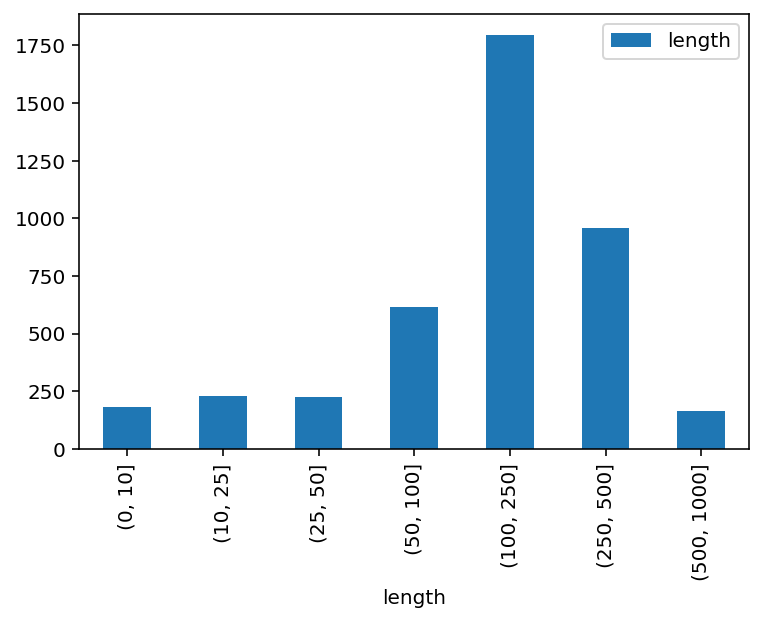

In [176]:
grouped_shorter_songs = without_long_songs.groupby(pd.cut(without_long_songs['length'], bins=[0, 10, 25, 50, 100, 250, 500, 1000]))
grouped_shorter_songs.count().plot(kind='bar')

In [177]:
def get_song_lengths_with_names(scores):
    output = []
    for score in scores:
        output.append(score.highestTime)
    return output

In [183]:
example

<music21.stream.Score 0x10d822970>